# Assignment 4 Colourizer

In [2]:
from PIL import Image
import numpy as np
import pandas as pd
import cv2
import random as rd
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")


In [35]:
orginal_image = Image.open("flower.jpg")

colour= np.array(orginal_image) # img dimension
colour_comp=np.array(orginal_image)

row=len(colour)
col=len(colour[0])
half_cols=int(col//2) 
print(row,col)
#img
#print(colour)
#half_cols= Half_cols

500 538


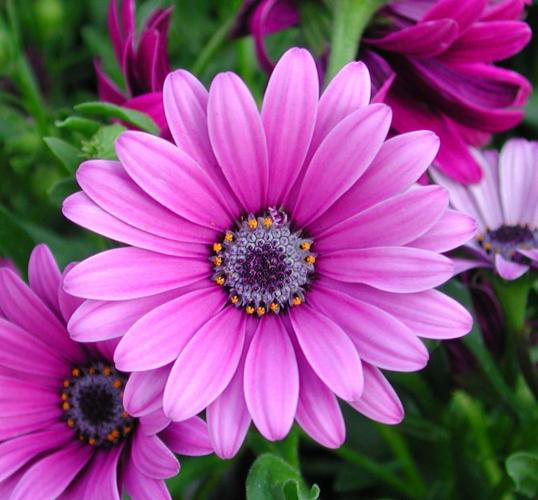

In [4]:
orginal_image

In [5]:
def cluster_allocation(img_array,row,half_cols,track_center,center):
    for i in range(row):
        for j in range(half_cols):
            dist = 10e9
            for k in range(len(center)):
                
                manha_dist = abs((center[k][0])-(img_array[i][j][0]))+abs((center[k][1])-(img_array[i][j][1]))+abs((center[k][2])-(img_array[i][j][2]))
                if(manha_dist<dist):
                    track_center[i][j] = k
                    dist = manha_dist
    return track_center     
                


# Basic Agent

In [6]:
def compute_new_center(img_array,n,half_cols,track_center,center):
    
    new_center=[0 for i in range(len(center))]
    for k in range(len(center)):
        count=0
        _r=0
        _g=0
        _b=0
        for i in range(n):
            for j in range(half_cols):
                if(track_center[i][j]==k):
                    count+=1
                    _r+=img_array[i][j][0]
                    _g+=img_array[i][j][1]
                    _b+=img_array[i][j][2]
        if(count != 0):
            new_center[k]=[int(_r/count),int(_g/count),int(_b/count)]   
            
    return new_center


In [7]:
k=5
center= [[rd.randint(0,255),rd.randint(0,255),rd.randint(0,255)] for i in range(k)] # random initial 5 centers
print(center,center[1][0],len(center))
n=len(colour) # rows of image
print(n,half_cols)
track_center=np.zeros((n,half_cols))

loop= True
while(loop):
    track_center=cluster_allocation(colour,n,half_cols,track_center,center) # allocating center id's
    new_center=compute_new_center(colour,n,half_cols,track_center,center) # comuniting new centers
    if(center==new_center):                          
        break
    else:
        center=new_center
center=new_center
print(track_center,center)

[[63, 255, 95], [114, 14, 204], [115, 226, 119], [117, 179, 7], [106, 57, 200]] 114 5
500 269
[[0. 0. 3. ... 1. 1. 1.]
 [3. 3. 3. ... 1. 1. 4.]
 [3. 3. 3. ... 1. 4. 4.]
 ...
 [4. 4. 4. ... 0. 0. 0.]
 [4. 4. 4. ... 0. 0. 0.]
 [4. 4. 4. ... 0. 0. 0.]] [[74, 79, 64], [150, 32, 128], [243, 143, 242], [31, 54, 22], [202, 75, 190]]


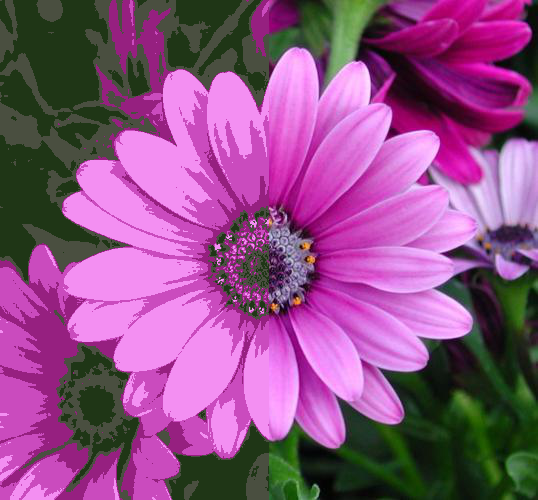

In [8]:
for i in range(row):
    for j in range(col//2):
        colour[i][j]= center[int(track_center[i][j])] # assigning colour to be used for that pixel
#print(colour)
output_img = Image.fromarray(colour)   
output_img
        

In [9]:
def mse(imageA, imageB):
# 'Mean Squared Error' between the two images is the sum of the squared difference between the two images

    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

# return the MSE, the lower the error, the more similar the two images are
    return err

In [10]:
x=mse(colour_comp,colour)
print(x)

780.1314423791822


In [11]:
c=mse(colour_comp,colour_comp)
print(c) # mse zero if the images are identical

0.0


In [12]:
#gray_img = Image.open('flower.jpg').convert('LA')
#gray_img

img = Image.open('flower.jpg')
rgb = img.convert("RGB")
width,height = rgb.size

gray = Image.new('L', (width, height))

for x in range(width):
    for y in range(height):
        r, g, b = img.getpixel((x, y))
        value = r * 210.0/1000 + g * 720.0/1000 + b * 7.0/1000
        value = int(value)
        gray.putpixel((x, y), value)

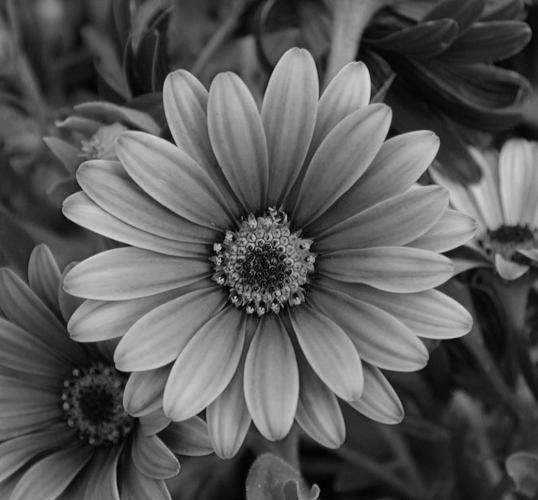

In [13]:
gray

In [14]:
gray_img_as_arr= np.array(gray)

#gray_img_as_arr=gray_img_as_arr[:,:,0]
gray_row= len(gray_img_as_arr)
gray_col= len(gray_img_as_arr[0])
gray_img_as_arr=gray_img_as_arr.reshape(gray_row,gray_col)

patches = []

for row in tqdm(range(0, gray_row - 2)):
    for col in range(0,(gray_col//2)-2):
        patches.append(gray_img_as_arr[row:row+3, col:col+3])
#print(patches)
arr_patch=np.array(patches)

100%|██████████████████████████████████████████████████████████████████████████████| 498/498 [00:00<00:00, 6485.35it/s]


In [15]:
gray_img_as_arr

array([[ 62,  62,  61, ...,  47,  44,  44],
       [ 61,  62,  61, ...,  43,  40,  39],
       [ 61,  61,  62, ...,  37,  36,  36],
       ...,
       [104, 105, 106, ...,  38,  37,  37],
       [110, 111, 112, ...,  35,  37,  37],
       [114, 114, 115, ...,  35,  36,  36]], dtype=uint8)

In [16]:
top=6
#right_side = gray_img_as_arr[:,gray_col//2:gray_col]

for row in tqdm(range(0,gray_row-2)):
    for col in range((gray_col//2),gray_col-2):
        patchr= np.array(gray_img_as_arr[row:row+3, col:col+3]) #current patch
        similarity = (np.sum(np.sum((arr_patch.__sub__(patchr))**2,axis=2),axis=1)) # finding similaraity between patches
        similarity=similarity.reshape(gray_row-2,(gray_col//2)-2)
        top_index=np.unravel_index(np.argsort(similarity.ravel())[:top], similarity.shape) #top 6 similar simlar for right side images when comapred to left
        
        count=[0,0,0,0,0]
        for s in range(top):
            r=top_index[0][s]+1
            c=top_index[1][s]+1
            count[int(track_center[r][c])]+=1
        #print(count)
        color_index=count.index(max(count))
        #print(color_index)
        colour[row][col]=center[color_index]
        


100%|████████████████████████████████████████████████████████████████████████████████| 498/498 [35:57<00:00,  4.33s/it]


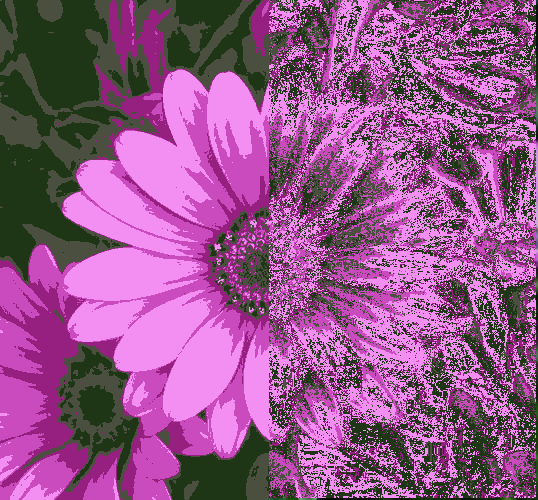

In [17]:
output_img = Image.fromarray(colour)   
output_img

In [19]:
err1=mse(colour_comp,colour)
print(err1)

16578.99901858736


#  Modified Agent using Nural Network

In [20]:
#forward propogation left to right computation
def get_hypothesis(X,theta_list,bias_list):
    A_list = [] #list of activations
    m,n = X.shape # shape of vector of input features
    A = X.T #transpose of input vectors
    A_list.append(A)
    #print(A.shape)
    for i in range(len(theta_list)):
        #print(i)
        Z = (np.dot(theta_list[i],A)) + bias_list[i] # z = weight.input vetcor + bias
        A = 1/(1+np.exp(-Z)) # sigmoid activation
        A_list.append(A)
    return A_list

In [21]:
def train(X,Y,iters,lr,bs):
    #print(X.shape, Y.shape)
    m,n = X.shape

    nn_architecture = [9,20,15,5] # list of number of neurons from input layer to output layer 
                                # including as many hidden layers as desired, I ran it with 2 hidden layers 
                                # with 20 and 15 nodes respectively.
    
    
    theta_list = []
    bias_list = []
    for i in range(len(nn_architecture)-1):
        theta = np.random.randn(nn_architecture[i+1],nn_architecture[i]) #random intialisation of weight
        bias = np.ones((nn_architecture[i+1],1)) # list og bias (ones)
        theta_list.append(theta)
        bias_list.append(bias)
        
    #iterations of gradient descent
    
    for i in range(iters): # iterate
        choices = np.array([np.random.randint(0,m) for _ in range(bs)]) #getting random batch training examples
        theta_list_new = []
        bias_list_new = []
        A_list = get_hypothesis(X[choices,:].reshape(bs,n),theta_list,bias_list)
        A_temp = A_list[-1]
        Y_temp = (Y[:,choices]).reshape(nn_architecture[-1],bs)
        error = -(np.sum(Y_temp*np.log(A_temp)))/Y_temp.shape[1] #cost or error function cross entropy loss
        print('Iteration:',i,'Error:',error)
        
         #Back propogation
            
        delta_last = A_list[-1] - (Y[:,choices]).reshape(nn_architecture[-1],bs) 
        dJ_dw_last = (np.dot(delta_last,(A_list[-2]).T))/m # dervaitive of cost function with respect to parameter w
        dJ_db_last = np.sum(delta_last,axis=1,keepdims=True) # dervaitive of cost function with respect to parameter b
        #print('dj_db_last',dJ_db_last.shape)
        theta_last_new = theta_list[-1] - lr*dJ_dw_last # gradient decent update for last weight matrix
        bias_last_new = bias_list[-1] - lr*dJ_db_last # gradient decent update  for last bias matrix
        theta_list_new.insert(0,theta_last_new)
        bias_list_new.insert(0,bias_last_new)
        delta_prev = delta_last
        for i in range(len(theta_list)-2,-1,-1):
            theta = theta_list[i+1]
            #print('w',w.shape)
            A = A_list[i+1]
            delta_i = (np.dot(theta.T,delta_prev))*(A*(1-A))
            dJ_dw_i = np.dot(delta_i,(A_list[i]).T)
            dJ_db_i = np.sum(delta_i,axis=1,keepdims=True)
            theta_new = theta_list[i] - lr*dJ_dw_i # gradient decent update for weights
            bias_new = bias_list[i] - lr*dJ_db_i  # gradient decent update for bias
            theta_list_new.insert(0,theta_new)
            bias_list_new.insert(0,bias_new)
            delta_prev = delta_i
        theta_list = theta_list_new
        bias_list = bias_list_new
    return theta_list,bias_list

In [125]:

orginal_image_2 = Image.open('flower.jpg').convert('LA')
colour_2= np.array(orginal_image_2)
#print(type(colour_2))
colour_2=colour_2[:,:,0]
row2= len(colour_2)
col2= len(colour_2[0])
colour_2=colour_2.reshape(row2,col2)
print(row2,col2)

#print(colour2,row2,col2,half_cols2)

500 538


In [219]:
#preparing input features from left side of the image
u=[]
v=[]
for row in tqdm(range(0,row2-2)):
    for col in range((col2//2)-2):
        patchr= np.array(colour_2[row:row+3, col:col+3])
        #print(patchr)
        u.append(patchr.flatten())
v=np.array(u)

print(v) # x prepared


100%|███████████████████████████████████████████████████████████████████████████████| 498/498 [00:00<00:00, 604.46it/s]

[[62 62 61 ... 61 61 61]
 [62 61 59 ... 61 61 59]
 [61 59 60 ... 61 59 60]
 ...
 [92 87 81 ... 95 89 83]
 [87 81 81 ... 89 83 82]
 [81 81 83 ... 83 82 82]]


In [127]:
#print(track_center)

[[3. 3. 3. ... 1. 1. 1.]
 [3. 3. 3. ... 1. 1. 1.]
 [3. 3. 3. ... 1. 1. 0.]
 ...
 [0. 0. 0. ... 4. 4. 4.]
 [0. 0. 0. ... 4. 4. 4.]
 [0. 0. 0. ... 4. 4. 4.]]


In [128]:
q=[]
#track_center_np=np.array(track_center)
for row in tqdm(range(0,row2-2)):
    for col in range((col2//2)-2):
        patchr= np.array(track_center[row:row+3, col:col+3])
        #print(patchr)
        q.append(patchr.flatten())

c=np.array(q) # y prepared
center_element=[]
for i in range(len(c)):
    #print(c[i][4],i)
    center_element.append(c[i][4])
        

    

100%|██████████████████████████████████████████████████████████████████████████████| 498/498 [00:00<00:00, 1695.39it/s]


In [129]:
#len(c)
np.unique(c)
#c[248][4]

array([0., 1., 2., 3., 4.])

In [130]:
#mapping true final vector for each flattened patch in the form of n X 5 dimensional matrix 
main=[]

for val in center_element:
    f=np.zeros(5)
    f[int(val)]=1
    main.append(f)
       
main_np=np.array(main)


In [131]:
main_np=main_np.T # getting transpose to conver shape into 5 x n before inputting it to the model

In [225]:
print(X.shape,Y.shape, )
print(X,"\n\n\n",Y)

(132966, 9) (5, 132966)
[[62 62 61 ... 61 61 61]
 [62 61 59 ... 61 61 59]
 [61 59 60 ... 61 59 60]
 ...
 [92 87 81 ... 95 89 83]
 [87 81 81 ... 89 83 82]
 [81 81 83 ... 83 82 82]] 


 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]]


In [234]:
X = v # 1 column = 1 flattened image patch. 
Y = main_np # 1 column = true output vector of one flattened image patch

theta_list_best1,bias_list_best1 = train(X,Y,500,0.0000001,132966)


Iteration: 0 Error: 1.5742235294006441
Iteration: 1 Error: 1.5178922482626012
Iteration: 2 Error: 1.401064271859244
Iteration: 3 Error: 1.3942333543457166
Iteration: 4 Error: 1.389557003306389
Iteration: 5 Error: 1.3859266902722212
Iteration: 6 Error: 1.3795663009655932
Iteration: 7 Error: 1.3773709730446118
Iteration: 8 Error: 1.376043150433455
Iteration: 9 Error: 1.370944523541477
Iteration: 10 Error: 1.367303455061376
Iteration: 11 Error: 1.362727751382007
Iteration: 12 Error: 1.3632639727156757
Iteration: 13 Error: 1.3600294968722961
Iteration: 14 Error: 1.3581909423424465
Iteration: 15 Error: 1.360959215259547
Iteration: 16 Error: 1.3572106899659082
Iteration: 17 Error: 1.3551687456647403
Iteration: 18 Error: 1.3595677935176287
Iteration: 19 Error: 1.3567272071378667
Iteration: 20 Error: 1.3520089545053449
Iteration: 21 Error: 1.3543441378409362
Iteration: 22 Error: 1.3514230595060615
Iteration: 23 Error: 1.3529839811478495
Iteration: 24 Error: 1.3488912613257167
Iteration: 25 Err

KeyboardInterrupt: 

In [221]:
X.shape, Y.shape

((132966, 9), (5, 132966))

In [134]:
theta_list_=theta_list_best1
bias_list_=bias_list_best1
#theta_list_best=theta_list1
#bias_list_best=bias_list1

In [135]:
#Right half testing data
d=[]
f=[]
for row in tqdm(range(0,row2-2)):
    for col in range((col2//2),col2-2):
        patchr= np.array(colour_2[row:row+3, col:col+3])
        #print(patchr)
        d.append(patchr.flatten())
f=np.array(d)

print(f) #  testing data prepared

100%|██████████████████████████████████████████████████████████████████████████████| 498/498 [00:00<00:00, 1788.76it/s]

[[105 106 104 ... 114 109 103]
 [106 104  95 ... 109 103  98]
 [104  95  86 ... 103  98  82]
 ...
 [ 43  38  37 ...  30  31  34]
 [ 38  37  36 ...  31  34  35]
 [ 37  36  36 ...  34  35  35]]


In [136]:
f.shape

(132966, 9)

In [137]:
A=get_hypothesis(f,theta_list_,bias_list_)
Final= A[-1] # extracting final predicted vectors
fin_len=len(Final[0])

In [227]:
len(Final)

5

In [140]:
final_cent=[]
for i in range(fin_len):
    #print(Final[:,i])
    temp_var=Final[:,i]
    #print(np.argmax(temp_var))
    final_cent.append(np.argmax(temp_var)) #mapping predicted output vectors to centroids
    


In [142]:
print(len(final_cent))
temp_ar=np.array(final_cent)
o=abs((col2//2)-(col2-2))
print(row2-2,o)
temp_ar=temp_ar.reshape(row2-2,o) #reshapping to assign final colours to right side of the image

print(temp_ar)

132966
498 267
[[2 2 2 ... 2 4 2]
 [2 2 2 ... 2 4 4]
 [2 2 2 ... 2 4 4]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 4 2 2]
 [2 2 2 ... 2 2 2]]


In [ ]:
# colurising right half of the image
colour3= np.array(orginal_image)
for row in tqdm(range(0,row2-2)):
    for col in range(col2//2,col2-2):
        
        colour3[row][col]=center[int(temp_ar[row][col-269])]
    


output_img2 = Image.fromarray(colour3)   
output_img2

In [34]:
output_img_nn = np.array(output_img2)
#calculating MSE
err2=mse(output_img_nn,colour)
print(err2)

8851.326669144983
